In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
%matplotlib inline

Step 1: Importing necessary libraries <br> We import numpy for math operations, matplotlib for plotting, and scipy.signal for filtering functions and %matplotlib for inline plots <br> Step 2: Generate a clean sine wave signal <br> We create a simple 5 Hz sine wave sampled at 1000 Hz — this acts as our original signal before noise.


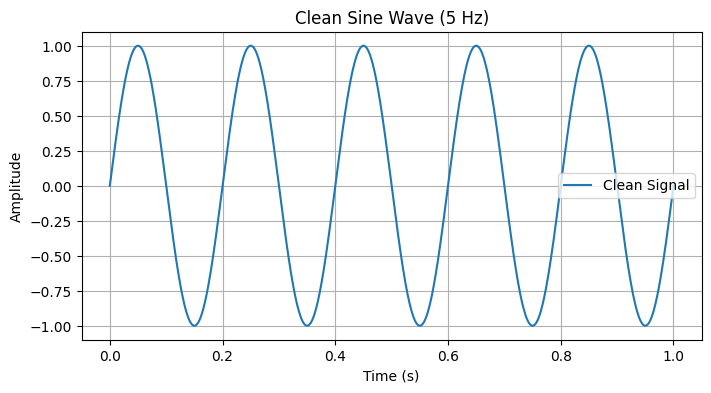

In [2]:
fs = 1000          # Sampling frequency (Hz)
t = np.linspace(0, 1, fs)  # 1 second duration
f = 5              # Signal frequency (Hz)

clean_signal = np.sin(2 * np.pi * f * t)

# Plot the clean signal
plt.figure(figsize=(8,4))
plt.plot(t, clean_signal, label='Clean Signal')
plt.title("Clean Sine Wave (5 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

Step 3: Add Gaussian noise to the signal <br> We simulate Additive White Gaussian Noise (AWGN) using a normal distribution with mean 0 and standard deviation 0.5.

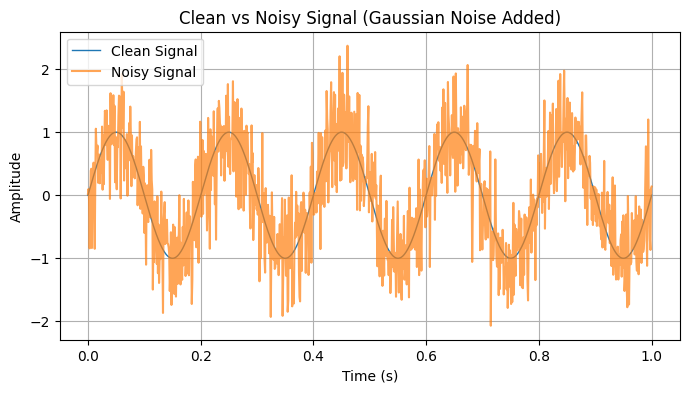

In [3]:
noise_std = 0.5  # Standard deviation of Gaussian noise
noise = np.random.normal(0, noise_std, len(t))
noisy_signal = clean_signal + noise

# Plot noisy vs clean signal
plt.figure(figsize=(8,4))
plt.plot(t, clean_signal, label='Clean Signal', linewidth=1)
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.title("Clean vs Noisy Signal (Gaussian Noise Added)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

Step 4: Apply a simple Moving Average Filter <br> The Moving Average filter smooths the signal by averaging nearby samples — it reduces random noise but can slightly distort sharp edges.

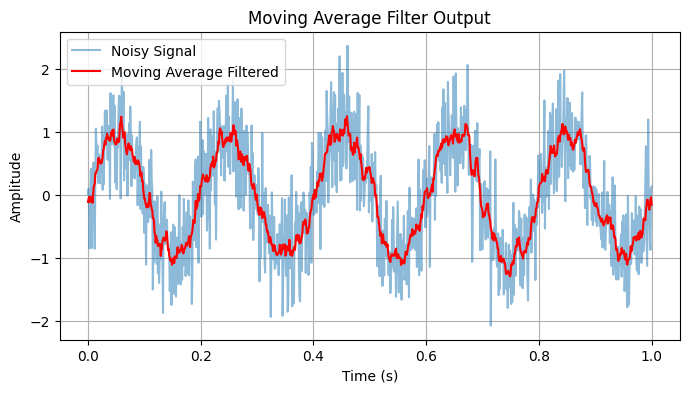

In [4]:
window_size = 10
moving_avg_filter = np.ones(window_size) / window_size
filtered_ma = np.convolve(noisy_signal, moving_avg_filter, mode='same')

# Plot
plt.figure(figsize=(8,4))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, filtered_ma, label='Moving Average Filtered', color='r')
plt.title("Moving Average Filter Output")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

Step 5: Apply Butterworth Low-Pass Filter <br> A Butterworth filter has a smooth frequency response and removes high-frequency noise while preserving the original waveform shape better than a moving average.

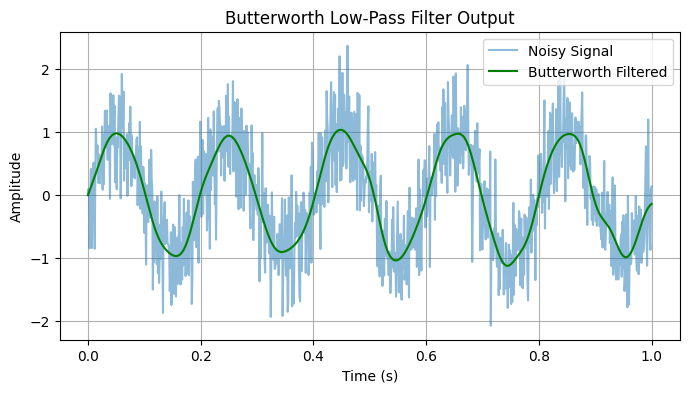

In [5]:
order = 4
cutoff_freq = 20  # Hz
b, a = butter(order, cutoff_freq / (fs / 2), btype='low')
filtered_butter = filtfilt(b, a, noisy_signal)

# Plot
plt.figure(figsize=(8,4))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, filtered_butter, label='Butterworth Filtered', color='g')
plt.title("Butterworth Low-Pass Filter Output")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

Step 6: Calculate Signal-to-Noise Ratio (SNR) <br> SNR measures how strong the desired signal is relative to the background noise.<br>
Higher SNR = better filtering performance.

In [6]:
def calculate_snr(original, processed):
    noise = original - processed
    return 10 * np.log10(np.mean(original**2) / np.mean(noise**2))

snr_noisy = calculate_snr(clean_signal, noisy_signal)
snr_ma = calculate_snr(clean_signal, filtered_ma)
snr_butter = calculate_snr(clean_signal, filtered_butter)

print(f"SNR (Noisy Signal): {snr_noisy:.2f} dB")
print(f"SNR (Moving Average): {snr_ma:.2f} dB")
print(f"SNR (Butterworth): {snr_butter:.2f} dB")

SNR (Noisy Signal): 3.15 dB
SNR (Moving Average): 14.37 dB
SNR (Butterworth): 19.59 dB


Step 7: Compare all results together. <br> This final plot lets you visually confirm which filter restores the original signal better.

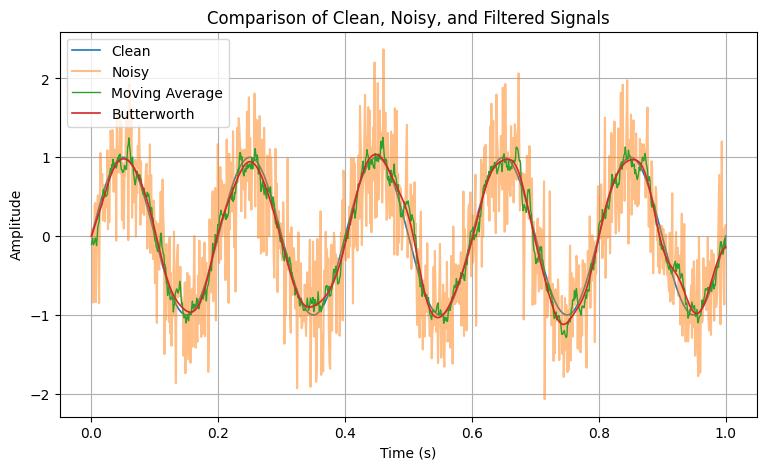

In [7]:
plt.figure(figsize=(9,5))
plt.plot(t, clean_signal, label='Clean', linewidth=1.2)
plt.plot(t, noisy_signal, label='Noisy', alpha=0.5)
plt.plot(t, filtered_ma, label='Moving Average', linewidth=1)
plt.plot(t, filtered_butter, label='Butterworth', linewidth=1.2)
plt.title("Comparison of Clean, Noisy, and Filtered Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

Step 8: Frequency domain comparison using FFT <br> The frequency domain shows how filters suppress unwanted high-frequency noise.

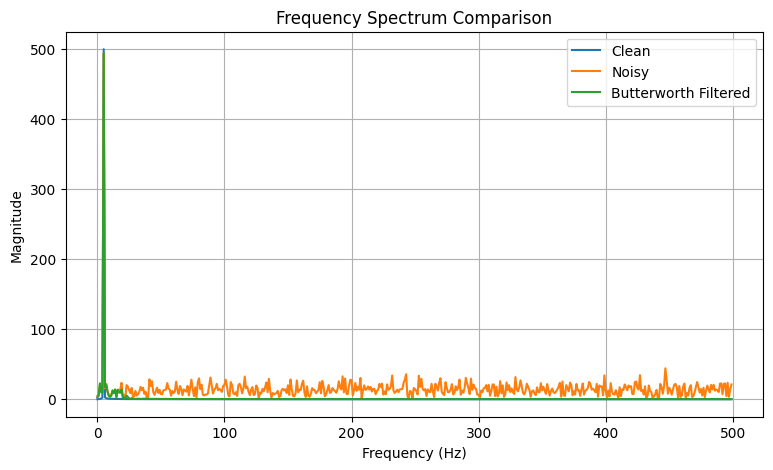

In [8]:
def plot_fft(signal, label):
    freq = np.fft.fftfreq(len(signal), 1/fs)
    spectrum = np.abs(np.fft.fft(signal))
    plt.plot(freq[:len(freq)//2], spectrum[:len(freq)//2], label=label)

plt.figure(figsize=(9,5))
plot_fft(clean_signal, 'Clean')
plot_fft(noisy_signal, 'Noisy')
plot_fft(filtered_butter, 'Butterworth Filtered')
plt.title("Frequency Spectrum Comparison")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()